# Prework for ML class - Khanh Nguyen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_bf = pd.read_excel("BodyFat.xls", index_col=0)
df_bf.head()

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
IDNO,,,,,,,,,,,,,,,,
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<IPython.core.display.Javascript object>


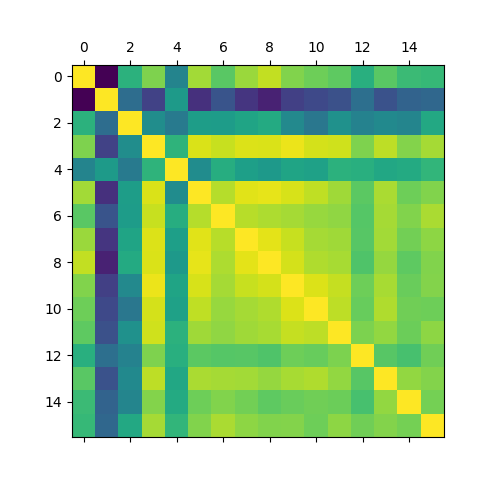

In [4]:
%matplotlib notebook
plt.matshow(df_bf.corr())

<IPython.core.display.Javascript object>


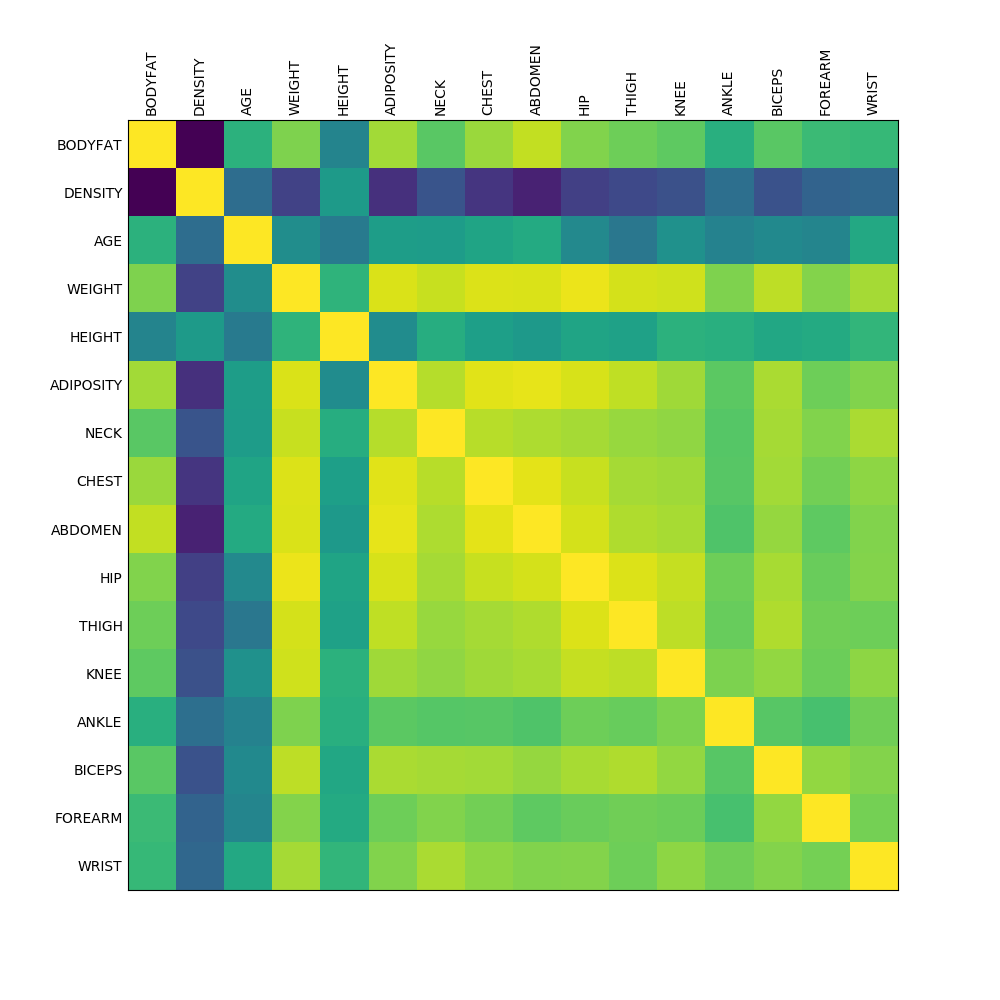

In [12]:
def plot_corr_with_labels(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(corr)
    ax.tick_params(axis="both", which="both", length=0)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr_with_labels(df_bf)

### 1. Find the body characteristic that's most strongly correlated with Adiposity (how fat one is). 

That could be asked this way: what's the best thing to measure if I want to predict how fat you are? Should I measure your ankle, your neck, your abdomen, etc? 

In [22]:
def most_strongly_corr_adiposity(df):
    corr = df.corr()['ADIPOSITY'].sort_values(ascending=False)
    # Remove it self for corr
    return corr[1:4]

most_strongly_corr_adiposity(df_bf)

ABDOMEN    0.923880
CHEST      0.911799
WEIGHT     0.887352
Name: ADIPOSITY, dtype: float64

### 2.What's the biggest change in this correlation between characteristics and adiposity as bodies age past 45?
That could be asked this way: what characteristic changes the most as you age?

In [35]:
def corr_change_base_on_age(df, age):
    under_age = df[df['AGE'] <  age]
    over_age  = df[df['AGE'] >= age]
#     print(under_age.shape)
#     print(over_age.shape)
    under_age_corr = under_age.corr()['ADIPOSITY']
    over_age_corr  = over_age.corr()['ADIPOSITY']
    return abs(under_age_corr -over_age_corr).sort_values(ascending=False)[0:3]
    
corr_change_base_on_age(df_bf, 45)
# print(df_bf.shape)

KNEE      0.108308
BICEPS    0.088720
ANKLE     0.061940
Name: ADIPOSITY, dtype: float64

## Adiposity
0: Underweight
1: Healthy
2: Overweight
3: Obese

In [52]:
# Preprocess data
df_bf['AGE'].min()
df_bf['AGE'].max()
age_under_39 = lambda x: 0 if x < 8  else ( 1 if x < 21 else ( 2 if x < 26 else 3))
age_40_59    = lambda x: 0 if x < 11 else ( 1 if x < 23 else ( 2 if x < 29 else 3))
age_over_60  = lambda x: 0 if x < 13 else ( 1 if x < 25 else ( 2 if x < 31 else 3))
obesity_classify = lambda x: age_under_39(x['ADIPOSITY']) if x['AGE'] < 40 else (age_40_59(x['ADIPOSITY']) if x['AGE'] < 60 else (age_over_60(x['ADIPOSITY'])))
df_bf['OBESITY_CLASS'] = df_bf.apply(obesity_classify, axis=1)
df_bf[df_bf['OBESITY_CLASS'] == 1].head()

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,OBESITY_CLASS
IDNO,,,,,,,,,,,,,,,,,
27,8.5,1.0811,34,131.50,67.50,20.3,36.2,88.6,74.6,85.3,51.7,34.7,21.4,28.7,27.0,16.5,1
45,8.4,1.0814,39,125.25,68.00,19.1,31.5,85.1,76.0,88.2,50.0,34.7,21.0,26.1,23.1,16.1,1
46,14.1,1.0670,43,164.25,73.25,21.3,35.7,96.6,81.5,97.2,58.4,38.2,23.4,29.7,27.4,18.3,1
47,11.2,1.0742,40,133.50,67.50,20.6,33.6,88.2,73.7,88.5,53.3,34.5,22.5,27.9,26.2,17.3,1
48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9,1


In [56]:
def corr_change_base_on_obesity(df, obesity_class_1, obesity_class_2):
    group_1 = df[df['OBESITY_CLASS'] == obesity_class_1]
    group_2 = df[df['OBESITY_CLASS'] == obesity_class_2]
    group_1_corr = group_1.corr()['ADIPOSITY']
    group_2_corr= group_2.corr()['ADIPOSITY']
    return abs(group_1_corr - group_2_corr).sort_values(ascending=False)[0:3]
corr_change_base_on_obesity(df_bf, 2, 3)

FOREARM    0.413199
ANKLE      0.331702
HIP        0.265477
Name: ADIPOSITY, dtype: float64